In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

# Train

Get csv files

In [2]:
candara = pd.read_csv("csv_files/CANDARA.csv")
richard = pd.read_csv("csv_files/RICHARD.csv")
book = pd.read_csv("csv_files/BOOK.csv")
bell = pd.read_csv("csv_files/BELL.csv")
brush = pd.read_csv("csv_files/BRUSH.csv")

Remove columns not used

In [3]:
csv_files = (candara, richard, book, bell, brush)

for file in csv_files:
    file.drop('font', axis=1, inplace=True)
    file.drop('fontVariant', axis=1, inplace=True)
    file.drop('strength', axis=1, inplace=True)
    file.drop('italic', axis=1, inplace=True)
    file.drop('orientation', axis=1, inplace=True)
    file.drop('m_top', axis=1, inplace=True)
    file.drop('m_left', axis=1, inplace=True)
    file.drop('originalH', axis=1, inplace=True)
    file.drop('originalW', axis=1, inplace=True)
    file.drop('h', axis=1, inplace=True)
    file.drop('w', axis=1, inplace=True)

Separate features and labels

In [4]:
all_files = pd.concat(csv_files)
all_files = all_files.sort_values(by=['m_label'])

all_labels = all_files['m_label']
all_files.drop('m_label', axis=1, inplace=True)

Invert colors: Black <-> White

In [5]:
all_files = (all_files - 255) * -1

Train with the csv data

In [6]:
clf = neighbors.KNeighborsClassifier(
    n_neighbors=10,
    n_jobs=5,
    leaf_size=10,
    weights='distance')
clf.fit(all_files, all_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=5, n_neighbors=10, p=2,
           weights='distance')

# Transform an image to array 20x20

In [7]:
from PIL import Image 

Get image

In [8]:
img = Image.open('letters/a1.jpg')
img = img.convert('L')
image_as_array = np.array(img)

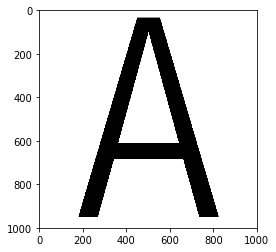

In [9]:
plt.imshow(image_as_array, cmap='gray', interpolation='nearest')

Resize image to a 20x20 matrix

In [10]:
img.thumbnail((20, 20), Image.ANTIALIAS)
image_as_array = np.array(img)

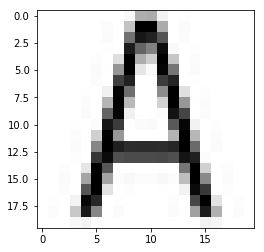

In [11]:
plt.imshow(image_as_array, cmap='gray', interpolation='nearest')

# Predict which label the image is

Some images wont have 20x20, so make them 20x20 using white columns

In [12]:
image_to_predict = image_as_array.copy()

while image_to_predict.shape[0] < 20:
    row = np.zeros(20) + 255
    image_to_predict = np.concatenate((image_to_predict, [row]))

Linearize 20x20 matrix to an array of 400 size

In [13]:
image_to_predict = np.asarray(image_to_predict).reshape(-1)

Finally predict which label the given image is

In [14]:
prediction = clf.predict([image_to_predict])[0]

# Verify prediction

In [15]:
prediction_image = book.query("m_label==%s" % prediction)[:1]

In [16]:
prediction_image.drop('m_label', axis=1, inplace=True)
prediction_image = prediction_image.as_matrix()
prediction_image = prediction_image.reshape((20, 20))
prediction_image = (prediction_image - 255) * -1

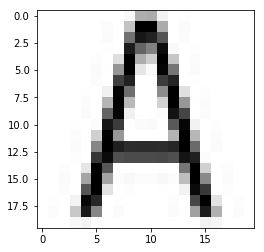

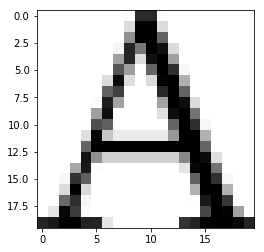

In [17]:
images = (image_as_array, prediction_image)

for ima in images:
    plt.figure()
    plt.imshow(ima)
    plt.imshow(ima, cmap='gray', interpolation='nearest')